<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/c_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/bank_customers_cleaned.csv"
data = pd.read_csv(url)


# Inspect the first few rows
print(data.head())


   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [28]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Check for duplicates
print("\nNumber of duplicates:", data.duplicated().sum())

# Remove duplicates if any
data = data.drop_duplicates()


Missing values per column:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Number of duplicates: 0


In [29]:
# Example: Fill missing values with median for numerical columns
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)


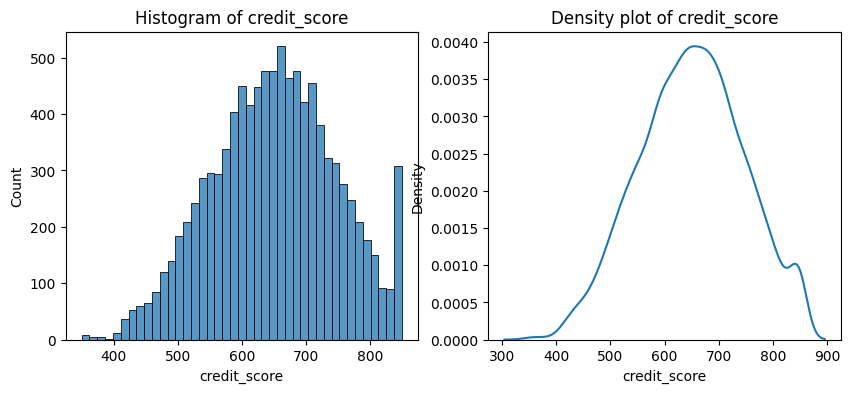

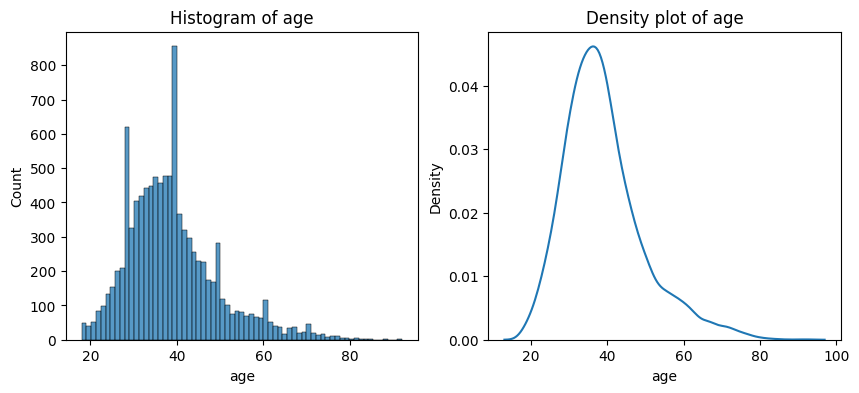

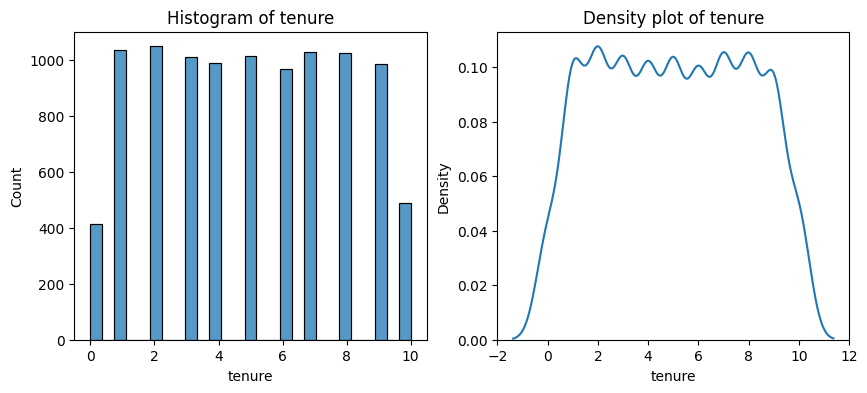

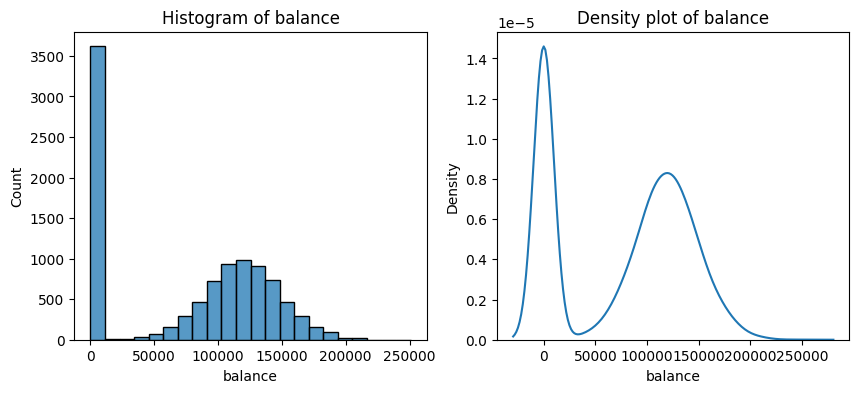

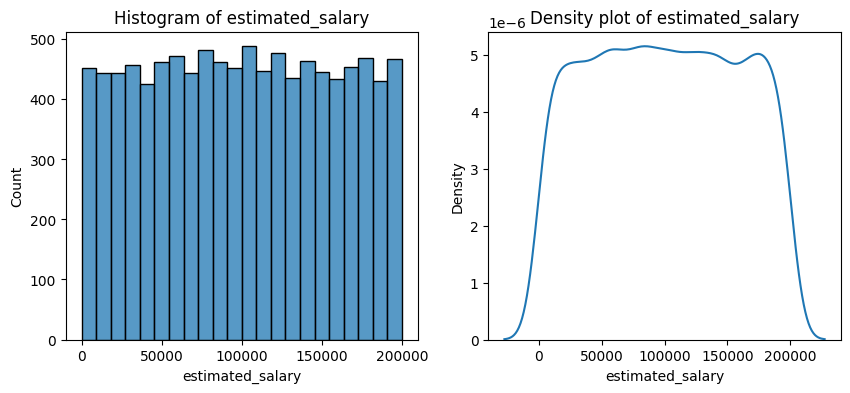

In [30]:
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

for col in num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=False)
    plt.title(f'Histogram of {col}')
    plt.subplot(1, 2, 2)
    sns.kdeplot(data[col])
    plt.title(f'Density plot of {col}')
    plt.show()


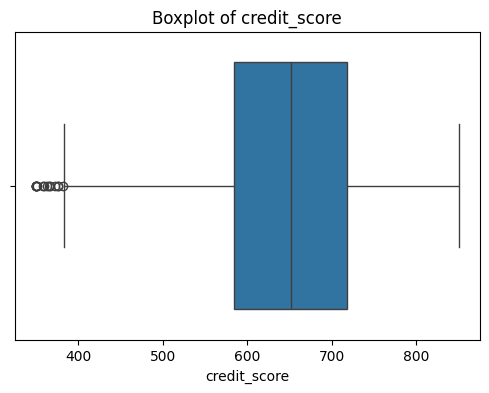

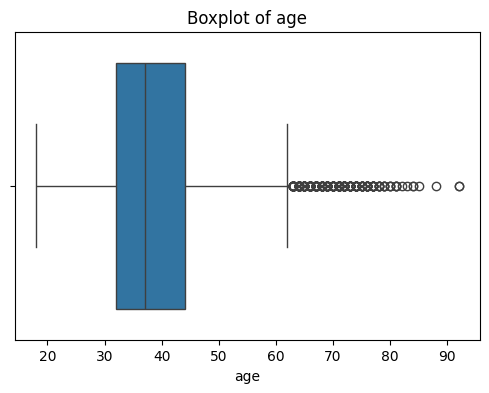

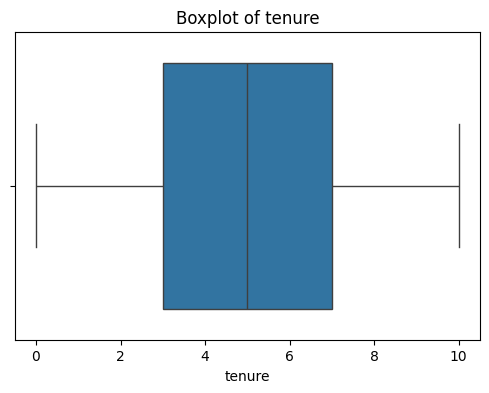

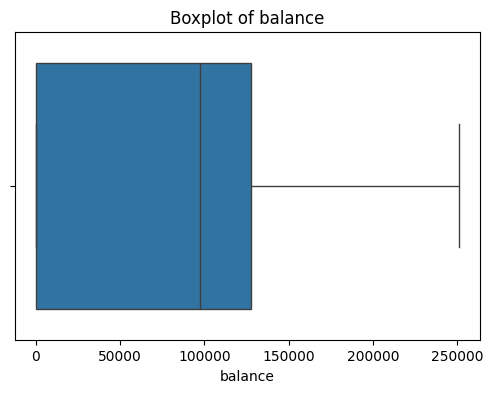

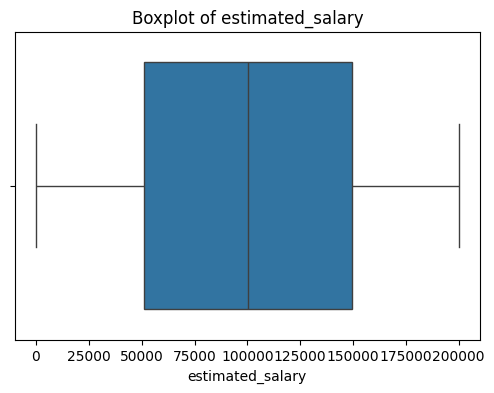

In [31]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


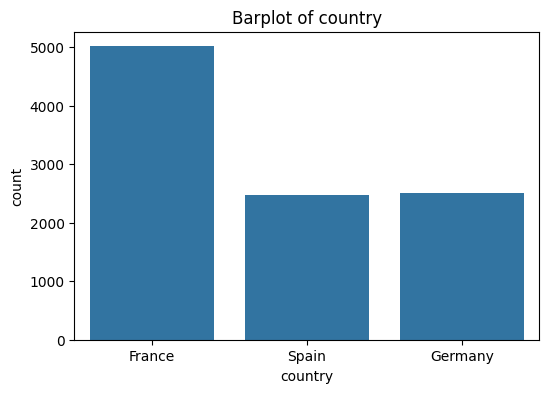

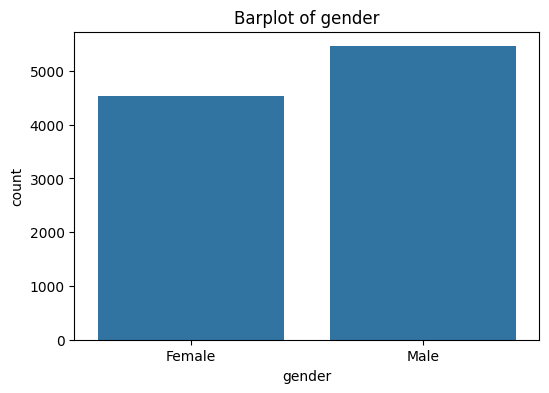

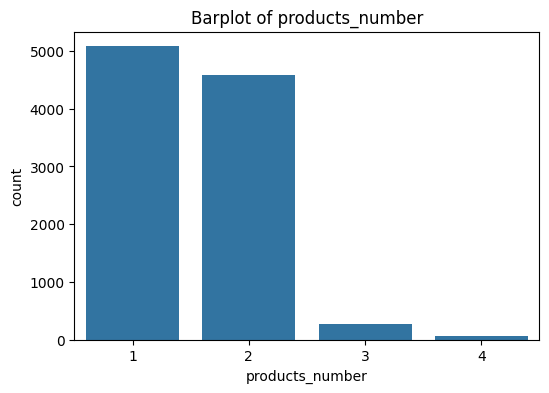

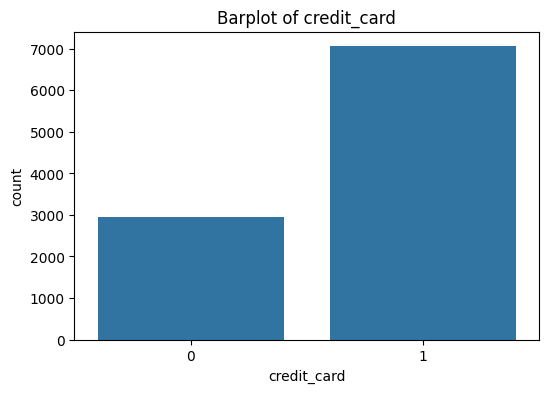

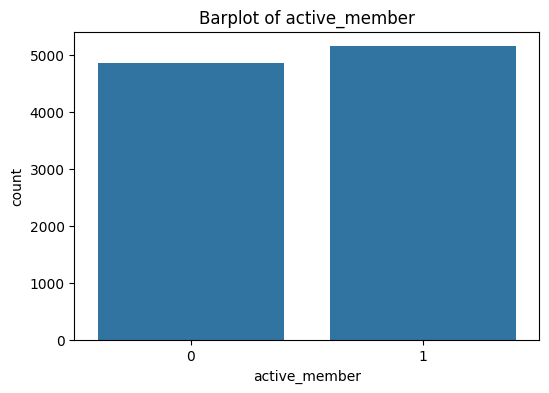

In [32]:
cat_cols = ['country', 'gender', 'products_number', 'credit_card', 'active_member']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[col])
    plt.title(f'Barplot of {col}')
    plt.show()


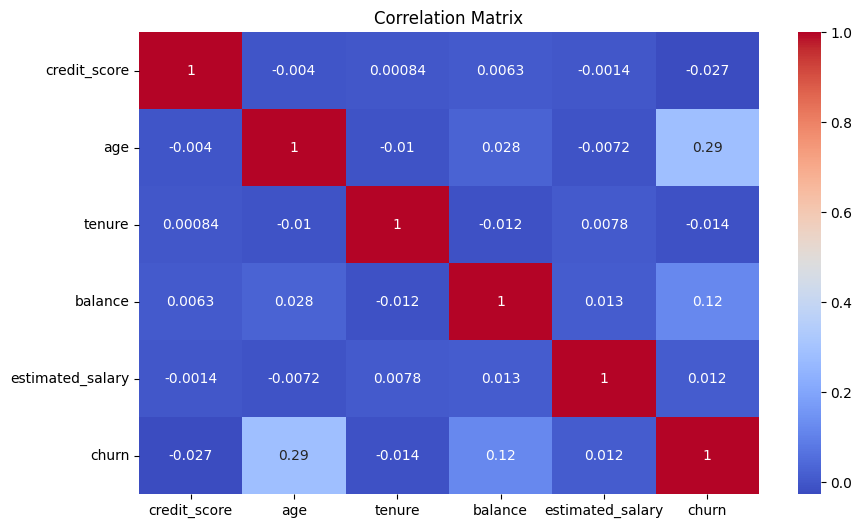

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[num_cols + ['churn']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


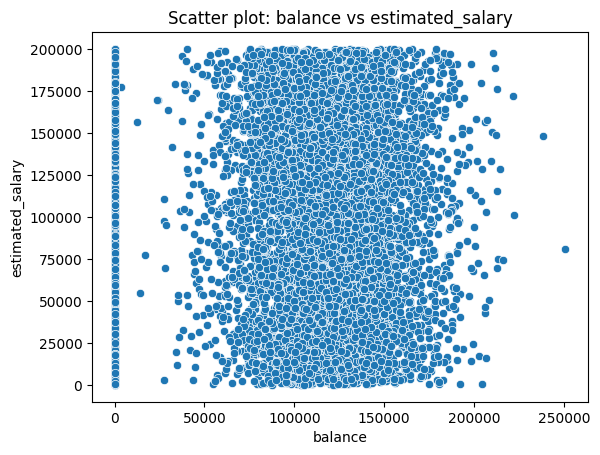

In [34]:
# Example for two features (choose highly correlated ones from the heatmap)
sns.scatterplot(x='balance', y='estimated_salary', data=data)
plt.title('Scatter plot: balance vs estimated_salary')
plt.show()
